# Using amazon dataset 

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
#reading file
data=pd.read_csv("amazon_jobs_dataset.csv")

In [89]:
data

,Title,location,Posting_date,DESCRIPTION,BASIC QUALIFICATIONS,PREFERRED QUALIFICATIONS,Myears,year
0,Software Development Manager,"US, WA, Seattle","March 1, 2018",You are an experienced hands-on manager with a...,· Proven track record of hiring and managing h...,· Experience building extremely high volume an...,2018,2018-03-01
1,Software Development Engineer,"IN, KA, Bangalore","March 1, 2018",Amazon is driven by being “the world’s most cu...,· Bachelor’s Degree in Computer Science or rel...,· Experience building complex software systems...,2018,2018-03-01
2,Software Development Engineer,"IN, KA, Bangalore","March 1, 2018",Amazon is driven by being “the world’s most cu...,· Bachelor’s Degree in Computer Science or rel...,· Experience building complex software systems...,2018,2018-03-01
3,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...,2018,2018-03-01
4,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...,2018,2018-03-01
...,...,...,...,...,...,...,...,...
3488,Software Engineer,"US, NV, Las Vegas","August 29, 2012",What are you currently doing? We’re building a...,· 5+ years production Java software developmen...,· 7+ years Java software development in a prod...,2012,2012-08-29
3489,Software Development Engineer,"US, WA, Seattle","April 23, 2012",At Amazon Voice and Advanced Natural Shopping ...,* Bachelor’s Degree in Computer Science or rel...,* Experience building complex software systems...,2012,2012-04-23
3490,Software Development Engineer III - Mar. BR 2012,"US, WA, Seattle","March 6, 2012",Employer: Amazon Corporate LLCPosition: Softwa...,Basic Qualifications:Education: Master’s degre...,-,2012,2012-03-06
3491,Software Development Engineer in Test II - IMM546,"US, WA, Seattle","November 28, 2011",POSITIONS AVAILABLECompany: Amazon Corporate L...,-,-,2011,2011-11-28


In [88]:
# Converting string date to date formate
data['year']=pd.to_datetime(data['Posting_date'])

# Plotting year -wise jobs posting

In [42]:
# Separting  years 
data['Myears']=data['year'].dt.year

In [43]:
data.drop('year',inplace=True,axis=1)

In [44]:
data.columns

Index(['Unnamed: 0', 'Title', 'location', 'Posting_date', 'DESCRIPTION',
       'BASIC QUALIFICATIONS', 'PREFERRED QUALIFICATIONS', 'Myears'],
      dtype='object')

In [45]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [73]:
job=[]

In [74]:
# extracting no. of rows by years
job.append(data[data.Myears==2011].Myears.count())
job.append(data[data.Myears==2012].Myears.count())
job.append(data[data.Myears==2013].Myears.count())
job.append(data[data.Myears==2014].Myears.count())
job.append(data[data.Myears==2015].Myears.count())
job.append(data[data.Myears==2016].Myears.count())
job.append(data[data.Myears==2017].Myears.count())
job.append(data[data.Myears==2018].Myears.count())

In [79]:
job

[2, 7, 3, 5, 29, 123, 1614, 1710]

In [78]:
years=[2011,2012,2013,2014,2015,2016,2017,2018]

In [91]:
for i,d in enumerate(years):
    print(d,job[i])

2011 2
2012 7
2013 3
2014 5
2015 29
2016 123
2017 1614
2018 1710


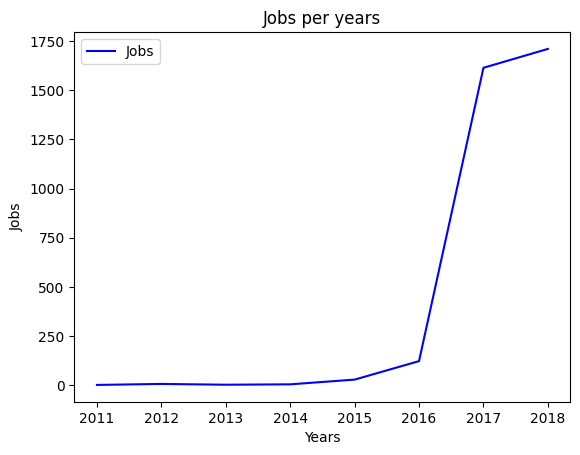

In [87]:
# plotting graphs
plt.plot(years,job,'b',label="Jobs")
plt.legend()
plt.title("Jobs per years")
plt.xlabel('Years')
plt.ylabel('Jobs')
plt.show()

# Bar graph   month vs jobs posting

In [104]:
data['month']=data['year'].dt.month

In [176]:
m=data['month'].unique()

In [181]:
d=[]
for i in m:
    d.append((data['month']==i).sum())
da=np.array(d)

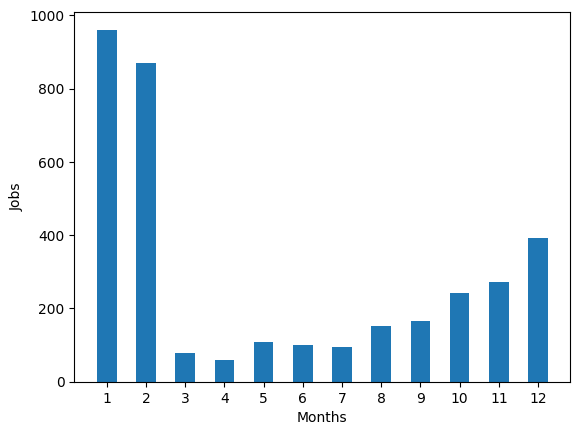

In [189]:
plt.bar(m,d,width=0.5)
plt.xlabel('Months')
plt.ylabel('Jobs')
plt.xticks(m)
plt.show()

# Pie chart  jobs in indian cities

In [338]:
cou=data['location'].str.split(',',n = 3, expand = True)

In [339]:
cou[2]=cou[2].str.strip(' ')
b=np.array(cou[2])

In [340]:
b

array(['Seattle', 'Bangalore', 'Bangalore', ..., 'Seattle', 'Seattle',
       'Seattle'], dtype=object)

In [341]:
data['city']=cou[2]
data['Country']=cou[0]


In [342]:
ind=data[data.Country=='IN']

In [343]:
ind.head()

,Title,location,Posting_date,DESCRIPTION,BASIC QUALIFICATIONS,PREFERRED QUALIFICATIONS,Myears,year,month,Country,city
1,Software Development Engineer,"IN, KA, Bangalore","March 1, 2018",Amazon is driven by being “the world’s most cu...,· Bachelor’s Degree in Computer Science or rel...,· Experience building complex software systems...,2018,2018-03-01,3,IN,Bangalore
2,Software Development Engineer,"IN, KA, Bangalore","March 1, 2018",Amazon is driven by being “the world’s most cu...,· Bachelor’s Degree in Computer Science or rel...,· Experience building complex software systems...,2018,2018-03-01,3,IN,Bangalore
30,Software Development Engineer,"IN, KA, Bangalore","February 28, 2018",Amazon is driven by being “the world’s most cu...,· Bachelor’s Degree in Computer Science or rel...,· Experience building complex software systems...,2018,2018-02-28,2,IN,Bangalore
31,Software Development Engineer,"IN, KA, Bangalore","February 28, 2018",Amazon is driven by being “the world’s most cu...,· Bachelor’s Degree in Computer Science or rel...,· Experience building complex software systems...,2018,2018-02-28,2,IN,Bangalore
69,Software Development Engineer,"IN, TS, Hyderabad","February 27, 2018",Amazon has come a long way since opening on th...,· Bachelor’s degree or higher in Computer Scie...,· Experience in Agile/SCRUM enterprise-scale s...,2018,2018-02-27,2,IN,Hyderabad


In [344]:
x=ind.city.unique()

In [345]:
x

array(['Bangalore', 'Hyderabad', 'Chennai', 'Gurgaon', 'Pune'],
      dtype=object)

In [366]:
y=[]
for i in x:
    y.append((ind.city==i).sum())

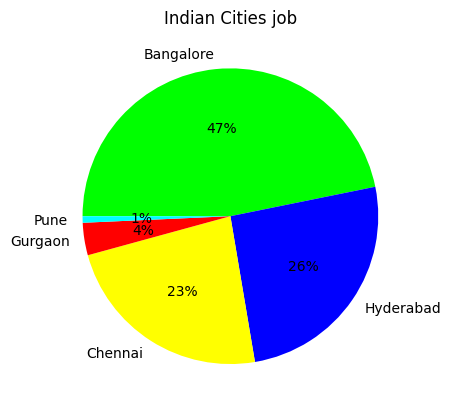

In [401]:

color=['lime','Blue','Yellow','Red','cyan']
plt.pie(y,labels=x,autopct='%.f%%',colors=color,startangle=180,counterclock=False)
plt.title("Indian Cities job")
plt.show()